## Foundations of Data Science - 2020 - Exercise Sheet 9
### Exercise 9.1 (Approximating A|x〉)
### In the course we have considered approximating A|x〉by using the SVD. Well, this task asks you to set up and run some experiments in order to check out whether this really works and how well. Feel free to use python or which ever implementation you prefer.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines


#### Consider the matrix

In [2]:
A = np.array([[1,0,1,0,0],
              [1,1,0,0,0],
              [0,1,0,0,0],
              [0,1,1,0,0],
              [0,0,0,1,0],
              [0,0,1,1,0],
              [0,0,0,1,0],
              [0,0,0,1,1]])

#### (i) Compute its 2-truncated SVD $A_{2}= U_{2}D_{2}V_{2}$.

In [3]:
u, s, vT = np.linalg.svd(A)
A_2 = np.matmul(u[:,:2] * s[:2], vT[:2])
print(A_2.round(2))

[[ 0.49  0.67  0.65  0.15  0.  ]
 [ 0.55  0.78  0.61 -0.2  -0.1 ]
 [ 0.32  0.46  0.35 -0.13 -0.07]
 [ 0.58  0.81  0.74  0.09 -0.03]
 [-0.06 -0.13  0.22  0.85  0.25]
 [ 0.19  0.22  0.61  1.07  0.28]
 [-0.06 -0.13  0.22  0.85  0.25]
 [-0.1  -0.2   0.26  1.09  0.32]]


#### (ii)  Compute $A^{T}|y〉$ and $A^{T}_{2}|y〉$ with $|y〉=|(0,0,0,0.5,0,0.5,0,0)〉$.

In [4]:
y = np.array([0,0,0,.5,0,.5,0,0]).reshape(-1, 1)
z = np.matmul(A.T, y)
z_2 = np.matmul(A_2.T, y)
print(z)
print(z_2)

[[0. ]
 [0.5]
 [1. ]
 [0.5]
 [0. ]]
[[0.38638611]
 [0.51428595]
 [0.67825179]
 [0.57779359]
 [0.12898205]]


#### (iii)  How large is the error? Compare it to the upper bound from the course.
From the lecture (p. 129): $$\frac{‖A_{2}|y〉- A|y〉‖_{2}}{‖|y〉‖_{2}} \leq \sigma_{2}$$

In [5]:
error = z - z_2
upper_bound = s[2] * np.linalg.norm(y)
print(f'Error = {np.linalg.norm(error):.3f}, it is smaller than theoretical! upper bound {upper_bound:.3f}')

Error = 0.525, it is smaller than theoretical! upper bound 0.962


In [6]:
np.random.randint(0,2, (2,2))

array([[1, 0],
       [0, 1]])

#### (iv)  Pick some suitable rank-2 matrices B and compute $‖A−B‖_{F}$ and $‖A−B‖_{2}$. Compare to $‖A−A_{2}‖_{F}$ and $‖A−A_{2}‖_{2}$, respectively.

#### We can also use the fact that the rank of $(nxk) * (kxn)$ is at most k and that numpy random tries  to make full rank matrices.

In [7]:
def random_matrix_like(A, N, rank=2):
    tensor1 = np.random.random((N, A.shape[0], rank))
    tensor2 = np.random.random((N, rank, A.shape[0]))
    return np.matmul(tensor1, tensor2)[:, :, :A.shape[1]]

def norm_to_matrix(A, BTensor, ord):
    return np.linalg.norm(A-BTensor, axis=(1,2), ord=ord)

In [8]:
N = 500000

BTensor = random_matrix_like(A, N)
min2    = np.min(norm_to_matrix(A, BTensor, 2))
minfro  = np.min(norm_to_matrix(A, BTensor, 'fro'))

In [9]:
A_2 = np.matmul(u[:,:2] * s[:2], vT[:2])

A2_error_2 = np.linalg.norm(A - A_2, ord=2)
A2_error_fro = np.linalg.norm(A - A_2, ord='fro')

print(A2_error_2, min2)
print(A2_error_fro, minfro)

1.360699308332465 1.5718790599545363
1.9329446892818882 2.6109828019735555


#### (v)  Plot the rows of $V_{2}D_{2}$. Which points are closest to $〈y|U_{2}D_{2}$?

In [10]:
V2S2 = vT[:2].T * s[:2]
yU2S2 = np.matmul(y.T, u[:,:2] * s[:2])

Cosinus of each point to orange dot:
1: 0.7727964887537563
2: 0.7306768205359725
3: 0.9844359912676068
4: 0.6187306127613198
5: 0.4849183185073803


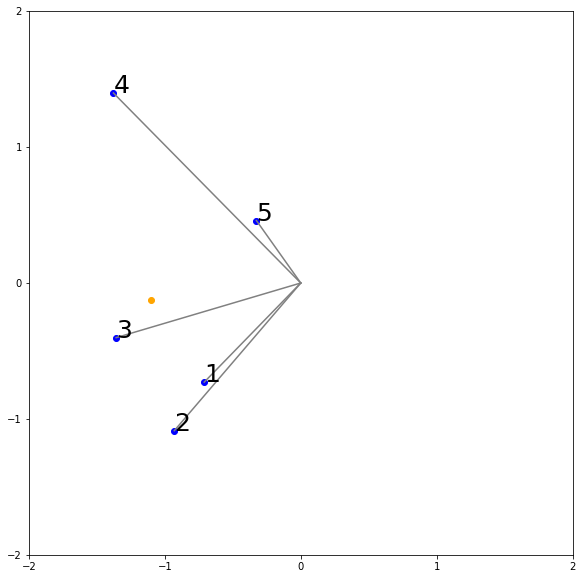

In [52]:
'''
@author: Pavel Raschetnov
'''

fig = plt.figure(figsize=(10,10))
plt.scatter(x=yU2S2[0,0], y=yU2S2[0,1], label='asdf', c='orange')
tmp = yU2S2[0,:2]
tmpNorm = np.linalg.norm(tmp)
print("Cosinus of each point to orange dot:")
for i in range(V2S2.shape[0]):
    x,y = V2S2[i]
    plt.scatter(x, y, c='blue')
    plt.annotate(str(i+1), (x,y), size=25)
    print(str(i+1) + ':', np.dot(np.array([x,y]).T, tmp) / (tmpNorm * np.linalg.norm(np.array([x,y]))))
    plt.plot([0, x], [0, y], linestyle='-', color='grey')
plt.xticks([-2,-1,0,1,2])
plt.yticks([-2,-1,0,1,2])
plt.gca().set_aspect('equal', adjustable='box')